In [17]:
import opensim as osim
import numpy as np
import matplotlib.pyplot as plt
from data_utils import *

In [18]:
data_dir = "..\data"
subject_id = 1
trial_name = "walking_baseline1"

data_tag = "forces.mot"

grf_file = 'walking_baseline1_forces.mot'
grf_file_path = f"{data_dir}\\Subject{subject_id}\\ExpmtlData\\GRF\\{trial_name}_{data_tag}"

grf_storage = osim.Storage(grf_file_path)

In [19]:
time_grf_col = osim.ArrayDouble()
grf_x_r_col = osim.ArrayDouble()
grf_y_r_col = osim.ArrayDouble()
grf_z_r_col = osim.ArrayDouble()
grf_x_l_col = osim.ArrayDouble()
grf_y_l_col = osim.ArrayDouble()
grf_z_l_col = osim.ArrayDouble()

grf_storage.getTimeColumn(time_grf_col)
grf_storage.getDataColumn('ground_force_vx', grf_x_r_col)
grf_storage.getDataColumn('ground_force_vy', grf_y_r_col)
grf_storage.getDataColumn('ground_force_vz', grf_z_r_col)
grf_storage.getDataColumn('1_ground_force_vx', grf_x_l_col)
grf_storage.getDataColumn('1_ground_force_vy', grf_y_l_col)
grf_storage.getDataColumn('1_ground_force_vz', grf_z_l_col)

time_grf = ad2float(time_grf_col)
grf_x_r = ad2float(grf_x_r_col)
grf_y_r = ad2float(grf_y_r_col)
grf_z_r = ad2float(grf_z_r_col)
grf_x_l = ad2float(grf_x_l_col)
grf_y_l = ad2float(grf_y_l_col)
grf_z_l = ad2float(grf_z_l_col)

In [20]:
type(grf_x_r)

numpy.ndarray

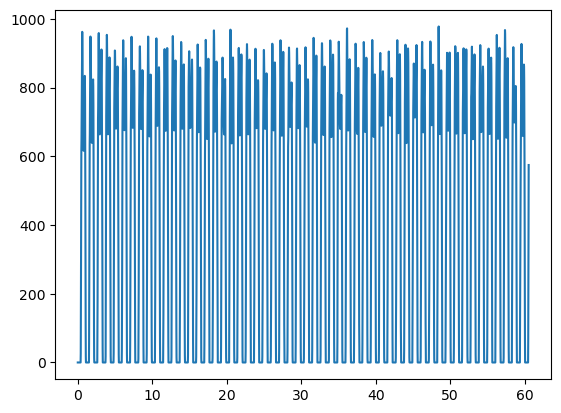

In [21]:
plt.plot(time_grf, grf_y_r)

plt.show()

In [27]:
seg_end_pairs = np.where(np.diff(grf_y_r > 0) == 1)[0] + 1

# seg_end_pairs

num_segments = len(seg_end_pairs) // 2
print(f"Number of segments: {num_segments}")

Number of segments: 54


In [60]:
time_intervals = np.diff(time_grf)

if len(time_intervals) > 0 and np.all(time_intervals > 0):
    average_time_interval = np.mean(time_intervals)
    sampling_frequency = 1 / average_time_interval
else:
    sampling_frequency = 0  # Undefined or zero frequency

# Output the results
print(f"Time intervals: {time_intervals}")
print(f"Average time interval: {average_time_interval:.4f} seconds")
print(f"Sampling frequency: {sampling_frequency:.2f} Hz")

Time intervals: [0.02     0.02     0.02     ... 0.02     0.02     0.020001]
Average time interval: 0.0200 seconds
Sampling frequency: 50.00 Hz


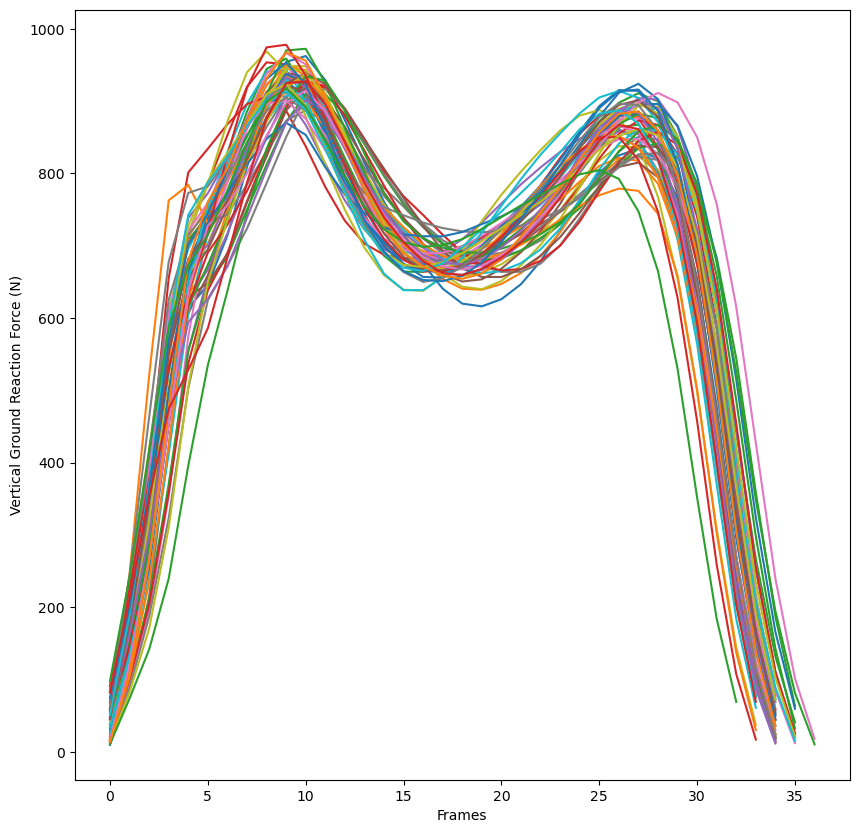

In [44]:
grf_segments = []

plt.figure(figsize=(10, 10))
for i in range(num_segments):
    start_idx = seg_end_pairs[2 * i]
    end_idx = seg_end_pairs[2 * i + 1]
    grf_segment = grf_y_r[start_idx:end_idx]
    grf_segments.append(grf_segment)
    plt.plot(grf_segment)

plt.xlabel("Frames")
plt.ylabel("Vertical Ground Reaction Force (N)")
plt.show()

In [59]:
print(f"Number of segments: {len(grf_segments)}")

# for i in range(len(grf_segments)):
#     print(grf_segments[i].shape)

max_len = max([segment.shape[0] for segment in grf_segments])
print(f"Max segment length: {max_len}")

Number of segments: 54
Max segment length: 37


In [61]:
# Define the sampling frequency (in Hz)
sampling_frequency = 50  # For example, 10 Hz

# Calculate the time step based on the sampling frequency
time_step = 1 / sampling_frequency

# Create a time column for each segment
time_columns = []

for segment in grf_segments:
    num_points = segment.shape[0]  # Get the number of data points in the segment
    time_column = np.arange(0, num_points) * time_step  # Generate time column
    time_columns.append(time_column)

# Output the time columns for each segment
for i, time_col in enumerate(time_columns):
    print(f"Time column for segment {i}:")
    print(time_col)

Time column for segment 0:
[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68]
Time column for segment 1:
[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68]
Time column for segment 2:
[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7 ]
Time column for segment 3:
[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68]
Time column for segment 4:
[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0

In [29]:
muscle_file = 'results_forces.sto'
muscle_force_file_path = f"{data_dir}\\Subject{subject_id}\\StaticOpt\\{trial_name}\\{muscle_file}"

muscle_storage = osim.Storage(muscle_force_file_path)

In [32]:
time_muscle_col = osim.ArrayDouble()
tibpost_r_col = osim.ArrayDouble()
tibant_r_col = osim.ArrayDouble()
edl_r_col = osim.ArrayDouble()
ehl_r_col = osim.ArrayDouble()
fdl_r_col = osim.ArrayDouble()
fhl_r_col = osim.ArrayDouble()
gaslat_r_col = osim.ArrayDouble()
gasmed_r_col = osim.ArrayDouble()
soleus_r_col = osim.ArrayDouble()
perbrev_r_col = osim.ArrayDouble()
perlong_r_col = osim.ArrayDouble()

muscle_storage.getTimeColumn(time_muscle_col)
muscle_storage.getDataColumn('tibpost_r', tibpost_r_col)
muscle_storage.getDataColumn('tibant_r', tibant_r_col)
muscle_storage.getDataColumn('edl_r', edl_r_col)
muscle_storage.getDataColumn('ehl_r', ehl_r_col)
muscle_storage.getDataColumn('fdl_r', fdl_r_col)
muscle_storage.getDataColumn('fhl_r', fhl_r_col)
muscle_storage.getDataColumn('gaslat_r', gaslat_r_col)
muscle_storage.getDataColumn('gasmed_r', gasmed_r_col)
muscle_storage.getDataColumn('soleus_r', soleus_r_col)
muscle_storage.getDataColumn('perbrev_r', perbrev_r_col)
muscle_storage.getDataColumn('perlong_r', perlong_r_col)

time_muscle = ad2float(time_muscle_col)
tibpost_r = ad2float(tibpost_r_col)
tibant_r = ad2float(tibant_r_col)
edl_r = ad2float(edl_r_col)
ehl_r = ad2float(ehl_r_col)
fdl_r = ad2float(fdl_r_col)
fhl_r = ad2float(fhl_r_col)
gaslat_r = ad2float(gaslat_r_col)
gasmed_r = ad2float(gasmed_r_col)
soleus_r = ad2float(soleus_r_col)
perbrev_r = ad2float(perbrev_r_col)
perlong_r = ad2float(perlong_r_col)

achilles_r = np.sum(np.array([gaslat_r, gasmed_r, soleus_r]), axis=0)

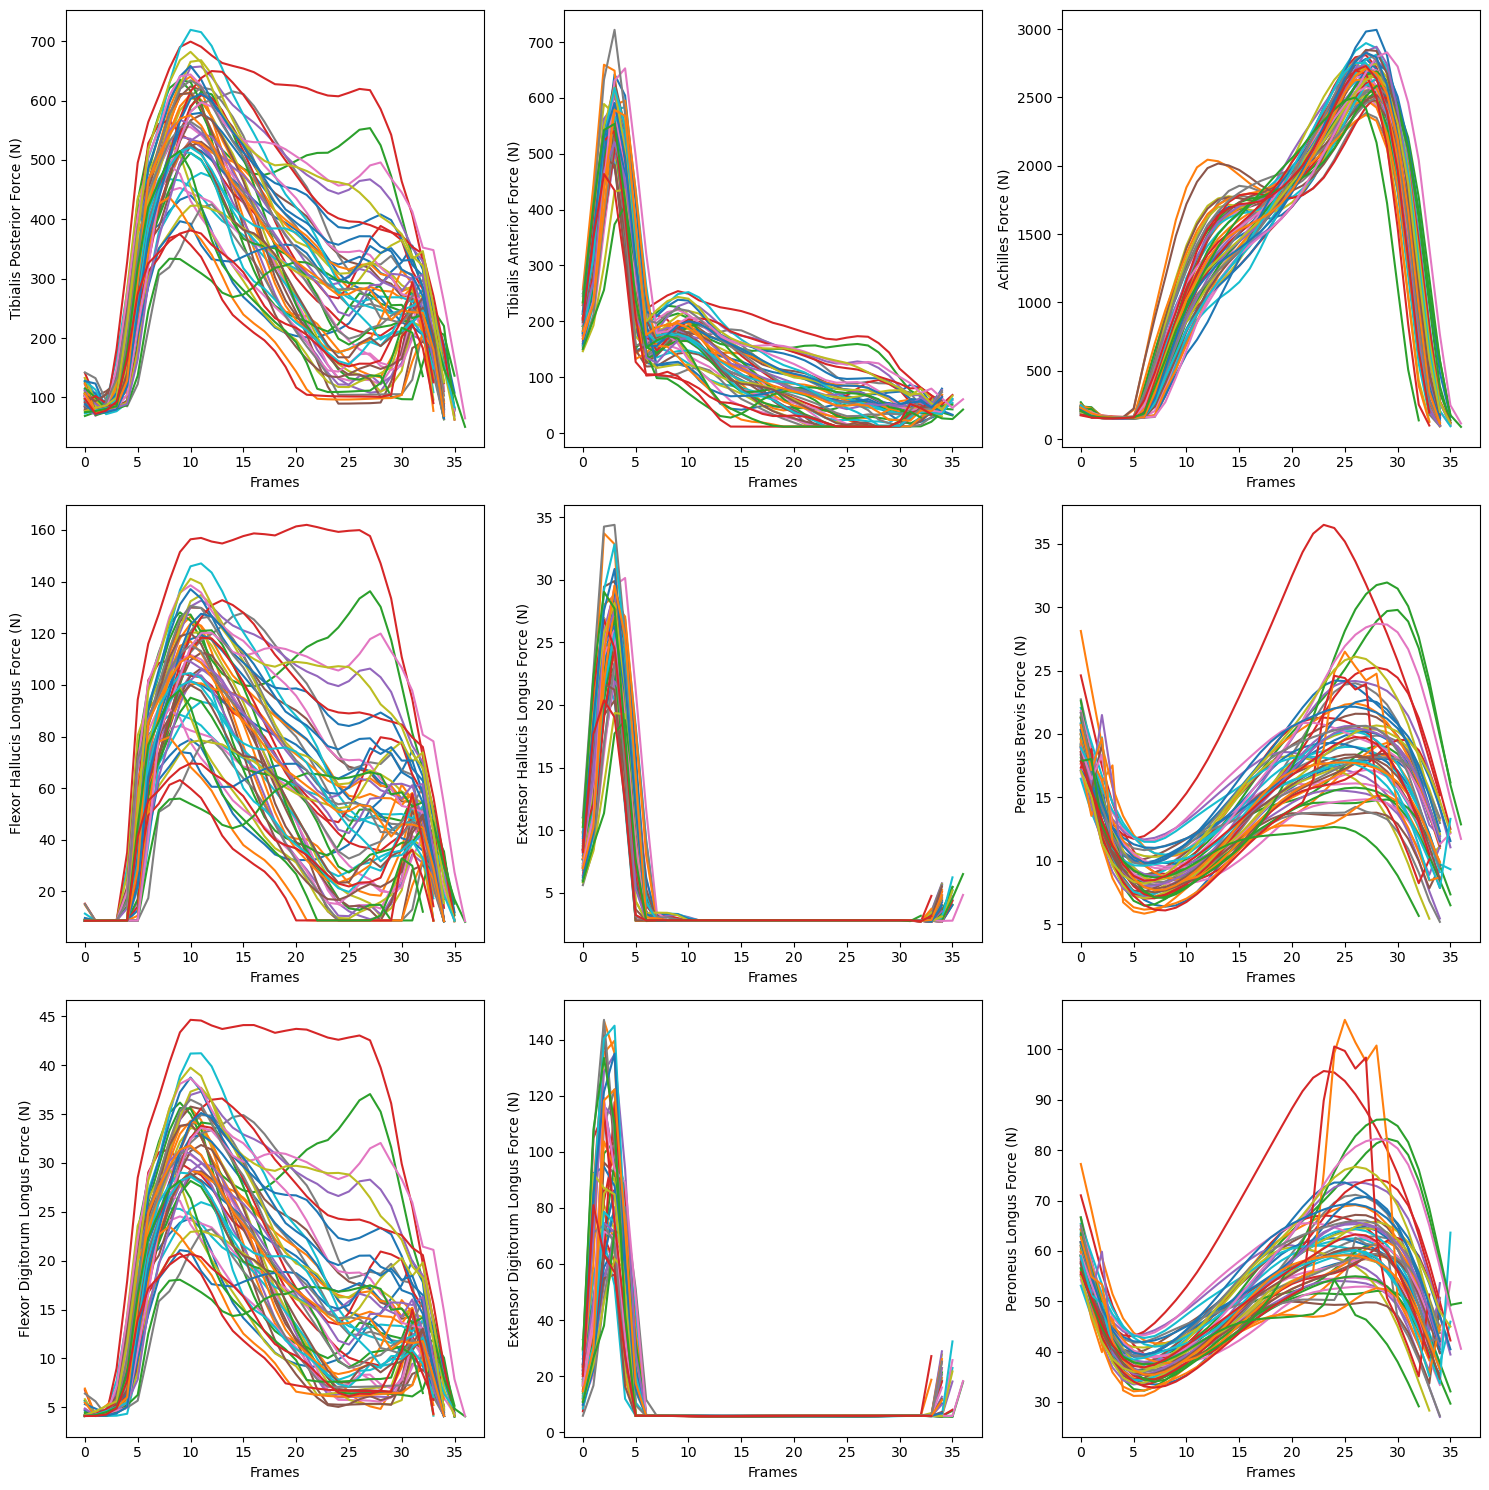

In [49]:
tibpost_r_segments = []
tibant_r_segments = []
edl_r_segments = []
ehl_r_segments = []
fdl_r_segments = []
fhl_r_segments = []
achilles_r_segments = []
perbrev_r_segments = []
perlong_r_segments = []

muscle_data = [
    (tibpost_r, tibpost_r_segments, 'Tibialis Posterior Force (N)', 1),
    (tibant_r, tibant_r_segments, 'Tibialis Anterior Force (N)', 2),
    (edl_r, edl_r_segments, 'Extensor Digitorum Longus Force (N)', 8),
    (ehl_r, ehl_r_segments, 'Extensor Hallucis Longus Force (N)', 5),
    (fdl_r, fdl_r_segments, 'Flexor Digitorum Longus Force (N)', 7),
    (fhl_r, fhl_r_segments, 'Flexor Hallucis Longus Force (N)', 4),
    (achilles_r, achilles_r_segments, 'Achilles Force (N)', 3),
    (perbrev_r, perbrev_r_segments, 'Peroneus Brevis Force (N)', 6),
    (perlong_r, perlong_r_segments, 'Peroneus Longus Force (N)', 9)
]

plt.figure(figsize=(15, 15))
for muscle, segments, ylabel, subplot_idx in muscle_data:
    plt.subplot(3, 3, subplot_idx)
    for i in range(num_segments):
        start_idx = seg_end_pairs[2 * i]
        end_idx = seg_end_pairs[2 * i + 1]
        muscle_segment = muscle[start_idx:end_idx]
        segments.append(muscle_segment)
        plt.plot(muscle_segment)
    plt.ylabel(ylabel)
    plt.xlabel("Frames")
    
plt.tight_layout()
plt.show()

In [52]:
print(tibpost_r_segments[1].shape)

(35,)
